## Reto Análisis de Datos

Lo primero, importamos la librería de pandas para poder leer el dataset. Se utiliza la variable df para hacer referencia al dataset y realizar consultas. Utilizamos la instrucción info para echar un primer vistazo al dataset y elegir con que columnas nos vamos a quedar.

In [4]:
import pandas as pd

df = pd.read_csv("IA.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     200 non-null    object 
 1   Year                                        200 non-null    int64  
 2   Industry                                    200 non-null    object 
 3   AI Adoption Rate (%)                        200 non-null    float64
 4   AI-Generated Content Volume (TBs per year)  200 non-null    float64
 5   Job Loss Due to AI (%)                      200 non-null    float64
 6   Revenue Increase Due to AI (%)              200 non-null    float64
 7   Human-AI Collaboration Rate (%)             200 non-null    float64
 8   Top AI Tools Used                           200 non-null    object 
 9   Regulation Status                           200 non-null    object 
 10  Consumer Trust

Seguidamente, eliminamos las columnas seleccionadas que menos valor aporten o no se terminen de comprender en base a nuestro criterio.

In [5]:
df.drop(columns=["Revenue Increase Due to AI (%)"], inplace=True)
df.drop(columns=["Human-AI Collaboration Rate (%)"], inplace=True)
df.drop(columns=["Top AI Tools Used"], inplace=True)
df.drop(columns=["Consumer Trust in AI (%)"], inplace=True)
df.drop(columns=["Market Share of AI Companies (%)"], inplace=True)

Continuamos renombrando multiples columnas para que sean más facil de referenciar durante el cuaderno.

In [6]:
df.rename(columns={'AI Adoption Rate (%)': 'AI Adoption Rate', 'AI-Generated Content Volume (TBs per year)': 'AI-Generated Content Volume', 'Job Loss Due to AI (%)': 'Job Loss Due to AI'}, inplace=True)

Puesto que el dataset es una elegido de kaggle no contiene ni datos nulos ni duplicados, por lo que hacemos uso de la librería numpy para la introducción de dichos valores.

In [7]:
import numpy as np

for col in ['Year', 'Regulation Status', 'Job Loss Due to AI']:
    df.loc[df.sample(frac=0.1).index, col] = np.nan

df = pd.concat([df, df.sample(5, random_state=42)], ignore_index=True)

En el párrafo de explicación del reto se explecifica que se divida el dataframe escogido en dos csv diferentes. Dicho proceso se realiza en los siguientes bloques de código, quedandonos con dos dataframes diferentes df1 y df2.

In [8]:
df[:75].to_csv("IA1.csv", index=False)
df[75:].to_csv("IA2.csv", index=False)

In [9]:
df1 = pd.read_csv("IA1.csv")
df2 = pd.read_csv("IA2.csv")

df1.head()

,Country,Year,Industry,AI Adoption Rate,AI-Generated Content Volume,Job Loss Due to AI,Regulation Status
0,South Korea,2022.0,Media,44.29,33.09,16.77,Strict
1,China,2025.0,Legal,34.75,66.74,46.89,Strict
2,USA,2022.0,Automotive,81.06,96.13,NaN,Moderate
3,France,2021.0,Legal,85.24,93.76,27.70,Moderate
4,France,2021.0,Gaming,78.95,45.62,17.45,Strict


In [10]:
df2.head()

,Country,Year,Industry,AI Adoption Rate,AI-Generated Content Volume,Job Loss Due to AI,Regulation Status
0,UK,NaN,Education,82.82,75.53,22.34,Strict
1,South Korea,NaN,Legal,75.42,24.03,28.82,Lenient
2,China,2021.0,Gaming,13.90,51.20,NaN,Moderate
3,Japan,2024.0,Manufacturing,82.72,17.97,23.56,Strict
4,India,2021.0,Education,63.04,82.49,6.68,Lenient


Se visualizan los valores nulos en df1.

In [11]:
print("Valores nulos df1:\n", df1.isnull().sum())

Valores nulos df1:
 Country                        0
Year                           4
Industry                       0
AI Adoption Rate               0
AI-Generated Content Volume    0
Job Loss Due to AI             6
Regulation Status              8
dtype: int64


Se visualizan los valores nulos en df2.

In [12]:
print("Valores nulos df2:\n", df2.isnull().sum())

Valores nulos df2:
 Country                         0
Year                           16
Industry                        0
AI Adoption Rate                0
AI-Generated Content Volume     0
Job Loss Due to AI             14
Regulation Status              15
dtype: int64


Se visualizan los valores duplicados en df1.

In [13]:
print("Valores duplicados df1:\n", df1.duplicated().sum())

Valores duplicados df1:
 0


Se visualizan los valores duplicados en df2.

In [14]:
print("Valores duplicados df2:\n", df2.duplicated().sum())

Valores duplicados df2:
 3


Se procede a tratar los valores nulos y duplicados de df1 y df2 en caso de tenerlos.

In [15]:
df1.dropna(inplace=True)
df2.dropna(inplace=True)
df2.drop_duplicates(inplace=True)

Importamos la librería de matplotlib y seaborn para poder visualizar gráficamente los datos de los dataframes.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

Visualizamos los datos numéricos del dataframe df1 y df2 observando coherencia en ellos.

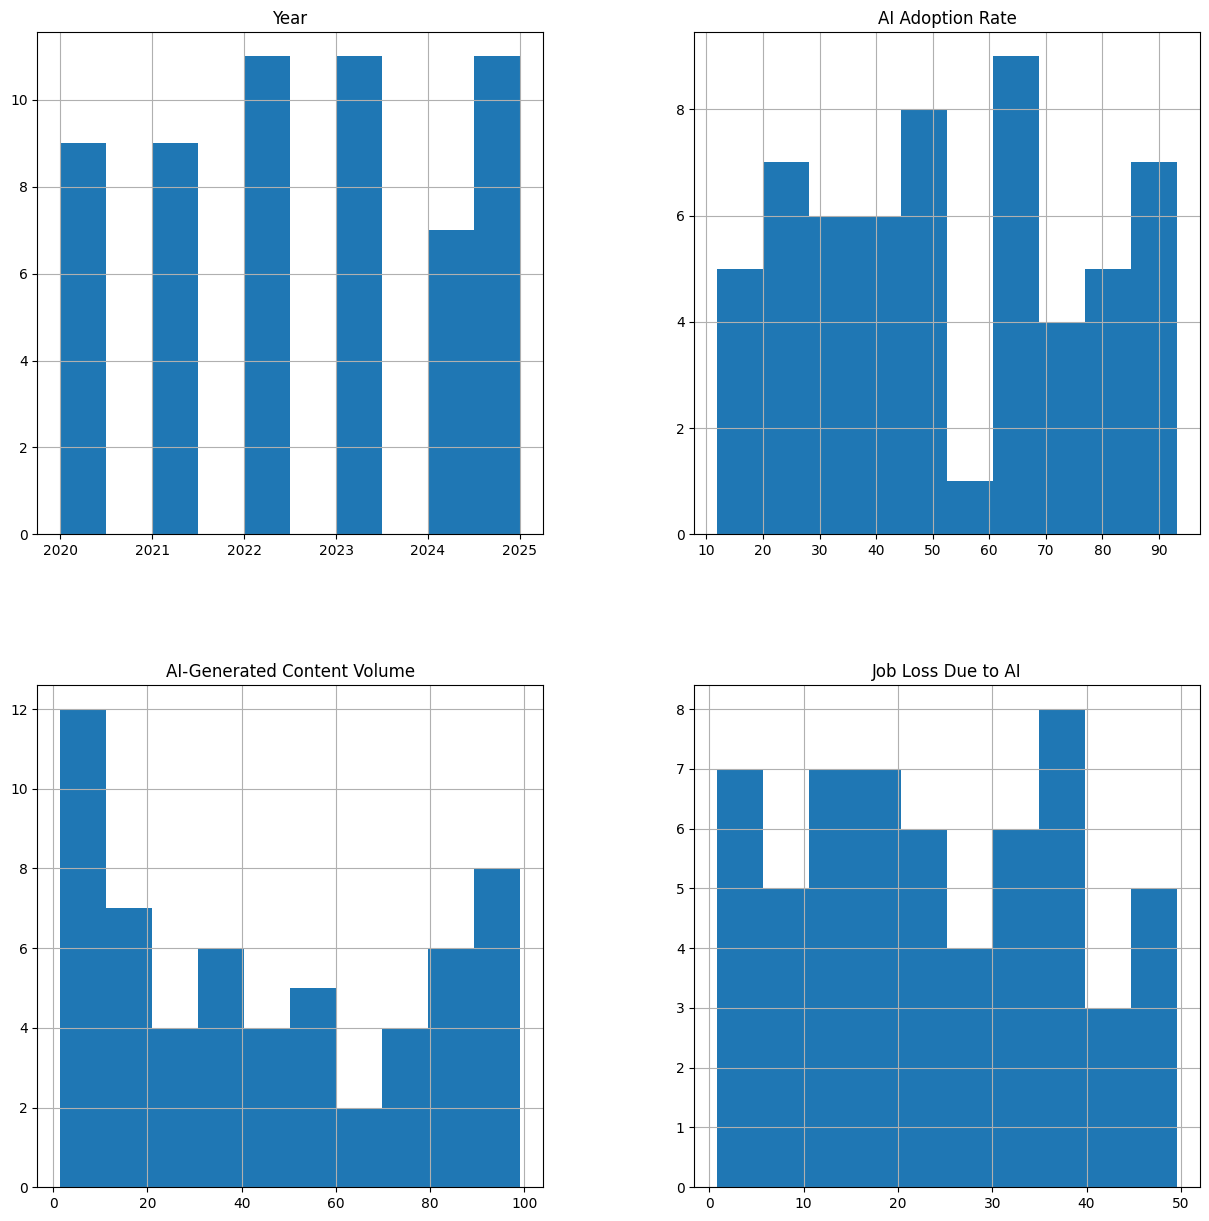

In [17]:
df1.hist(figsize=(15,15)) 
plt.show()

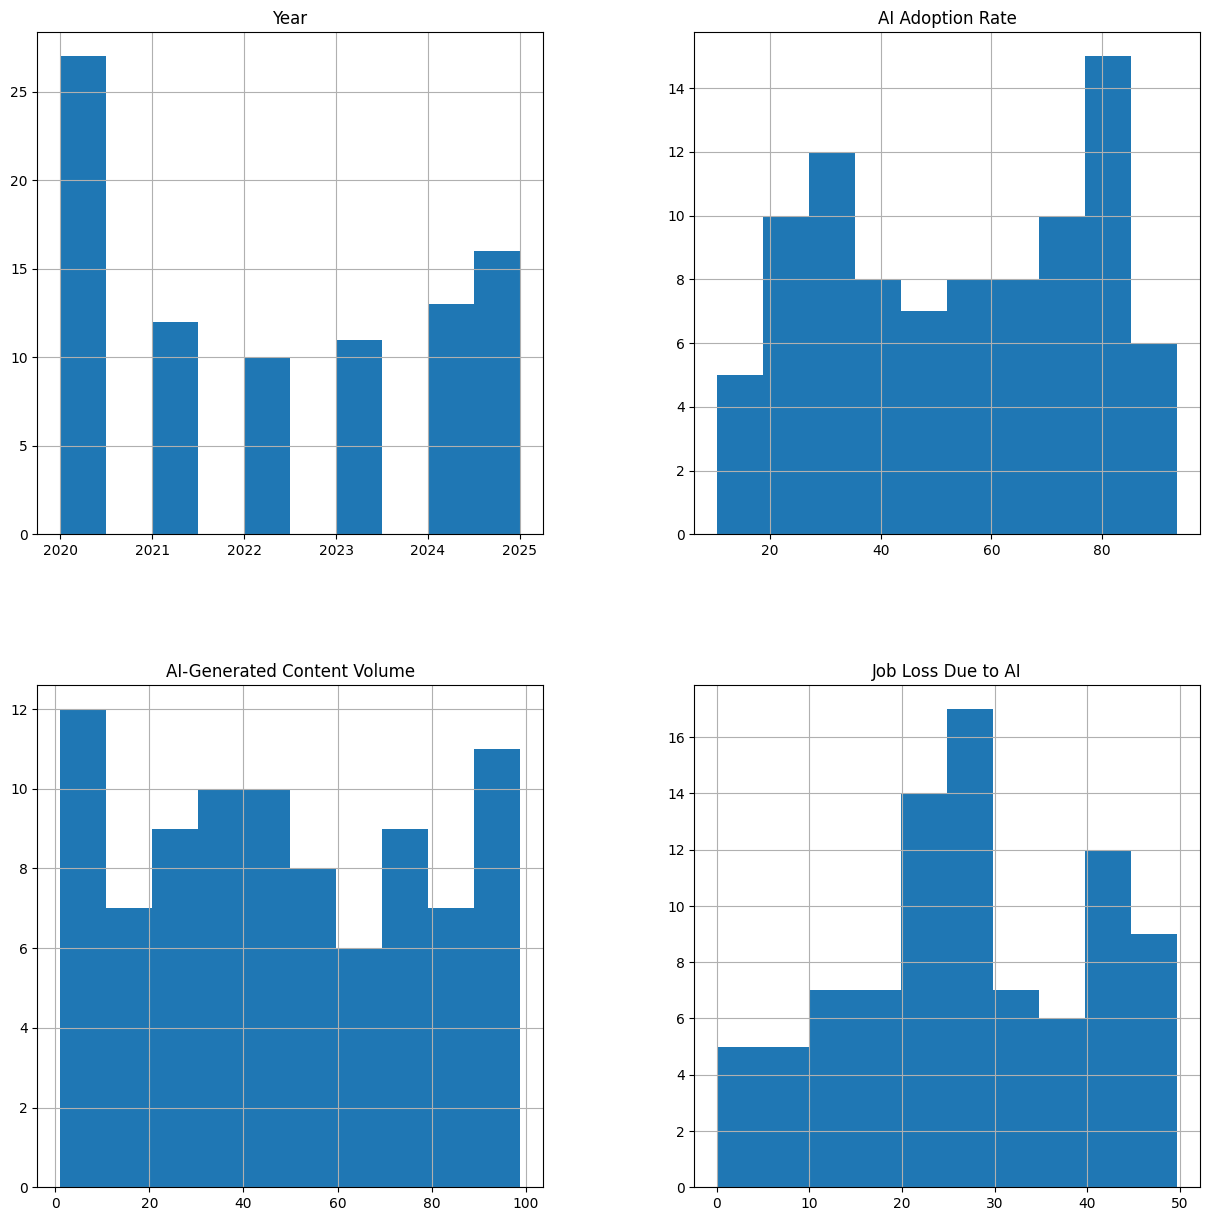

In [18]:
df2.hist(figsize=(15,15)) 
plt.show()

Pasamos a visualizar los datos categóricos del dataframe df1 y df2 observando coherencia en ellos.

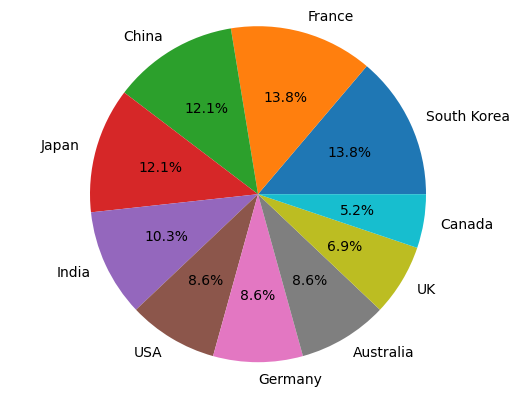

In [19]:
occupation_counts = df1['Country'].value_counts()

plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%')
plt.axis('equal')  
plt.show()

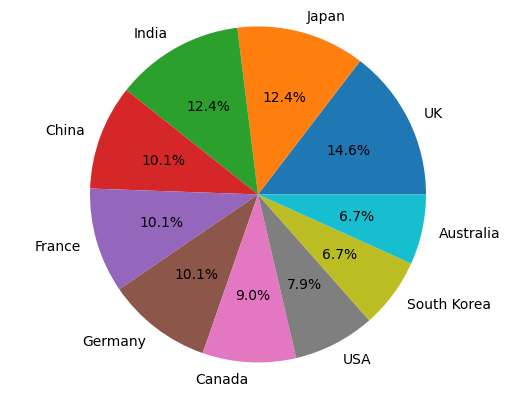

In [20]:
occupation_counts = df2['Country'].value_counts()

plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%')
plt.axis('equal')  
plt.show()

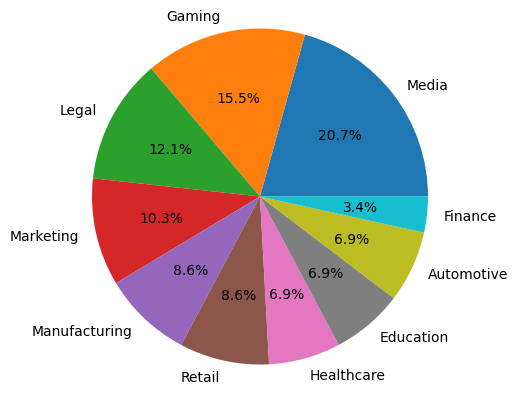

In [21]:
occupation_counts = df1['Industry'].value_counts()

plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%')
plt.axis('equal')  
plt.show()

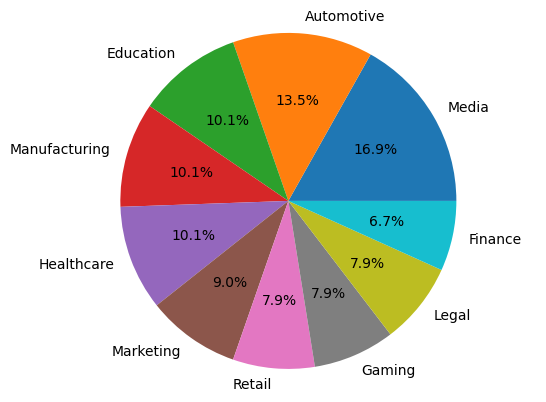

In [22]:
occupation_counts = df2['Industry'].value_counts()

plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%')
plt.axis('equal')  
plt.show()

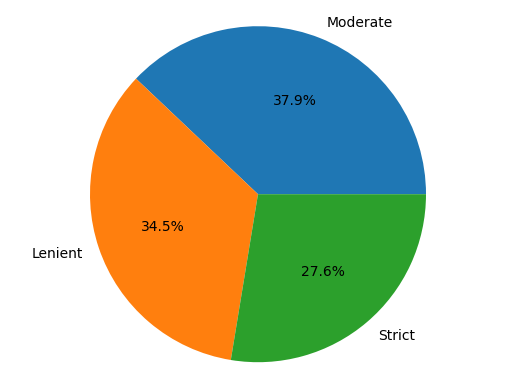

In [23]:
occupation_counts = df1['Regulation Status'].value_counts()

plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%')
plt.axis('equal')  
plt.show()

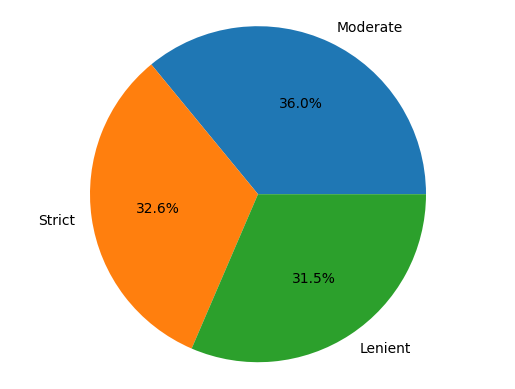

In [24]:
occupation_counts = df2['Regulation Status'].value_counts()

plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%')
plt.axis('equal')  
plt.show()

Realizamos un mapa de calor para ver si hay columnas con valores muy parecidos, lo que haría que sean redundantes.

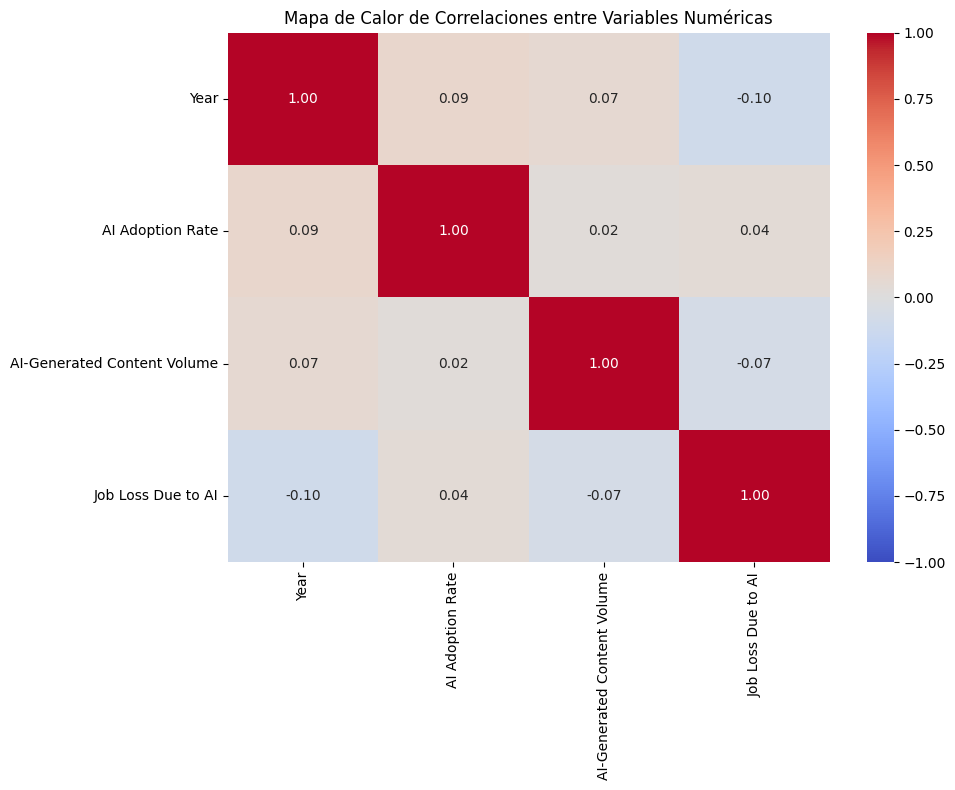

In [30]:
numericas = df2.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(numericas.corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlaciones entre Variables Numéricas')
plt.tight_layout()
plt.show()

Por ultimo, procedemos a realizar ciertos gráficos sobre los datos del dataframe. En este gráfico se puede ver ciertos antibajos en la adopcion de la IA, pero actualmente en todos ellos menos en Francia se esta incrementando.

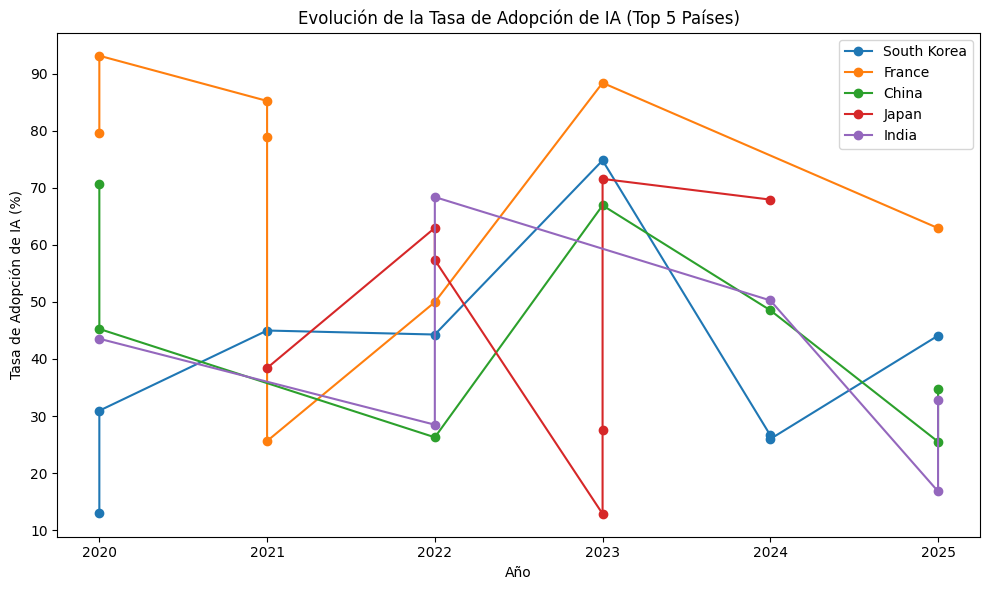

In [26]:
top_countries = df1['Country'].value_counts().nlargest(5).index
plt.figure(figsize=(10,6))
for country in top_countries:
    subset = df1[df1['Country'] == country].sort_values('Year')
    plt.plot(subset['Year'], subset['AI Adoption Rate'], label=country, marker='o')
plt.title('Evolución de la Tasa de Adopción de IA (Top 5 Países)')
plt.xlabel('Año')
plt.ylabel('Tasa de Adopción de IA (%)')
plt.legend()
plt.tight_layout()
plt.show()

En este gráfico se puede ver que la industria que más contenido genera con IA es en la legal y la que menos en el comercio local.

C:\Users\jcanadas\AppData\Local\Temp\ipykernel_22020\1263932203.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_volume.values, y=avg_volume.index, palette='coolwarm')


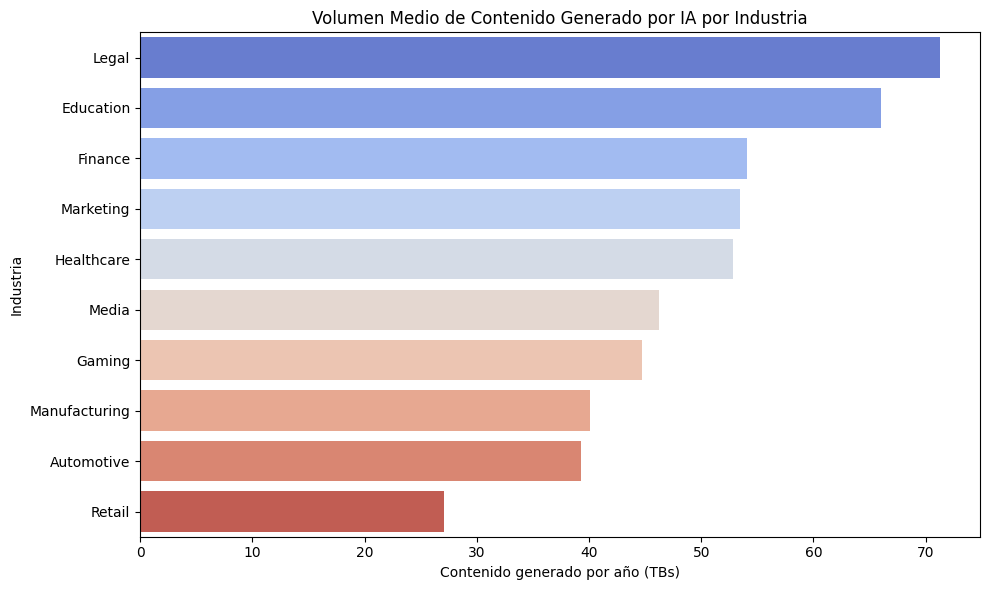

In [27]:
plt.figure(figsize=(10,6))
avg_volume = df2.groupby('Industry')['AI-Generated Content Volume'].mean().sort_values(ascending=False)
sns.barplot(x=avg_volume.values, y=avg_volume.index, palette='coolwarm')
plt.title('Volumen Medio de Contenido Generado por IA por Industria')
plt.xlabel('Contenido generado por año (TBs)')
plt.ylabel('Industria')
plt.tight_layout()
plt.show()


En este gráfico se puede ver que existe una correlación entre la perdida de empleo y la regulación de uso de IA leve o moderada.

C:\Users\jcanadas\AppData\Local\Temp\ipykernel_22020\4165959489.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x='Regulation Status', y='Job Loss Due to AI', palette='Set2')


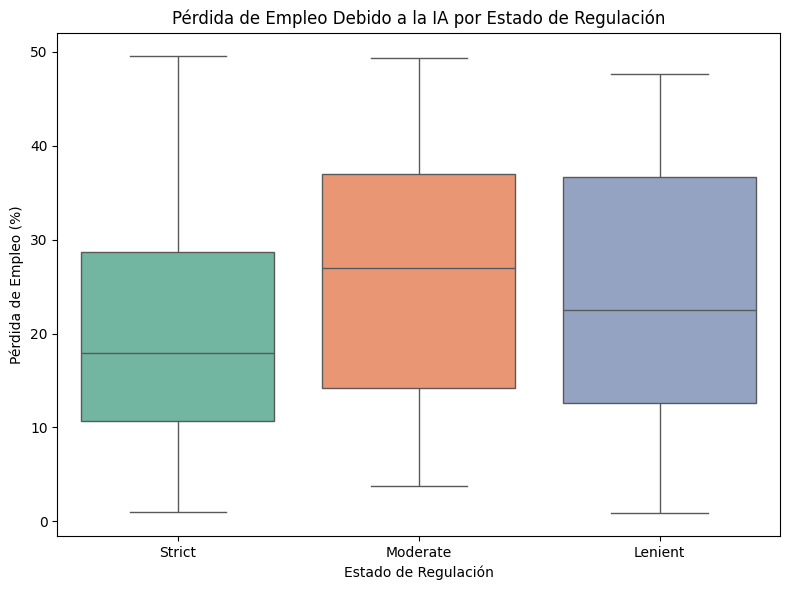

In [28]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df1, x='Regulation Status', y='Job Loss Due to AI', palette='Set2')
plt.title('Pérdida de Empleo Debido a la IA por Estado de Regulación')
plt.xlabel('Estado de Regulación')
plt.ylabel('Pérdida de Empleo (%)')
plt.tight_layout()
plt.show()

En este último gráfico se puede ver que depende de la industria en la que trabajes tendras major o menor posibilidad de perder tu trabajo debido a la IA.

C:\Users\jcanadas\AppData\Local\Temp\ipykernel_22020\3872706850.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df2, x='Industry', y='Job Loss Due to AI', palette='Set2')


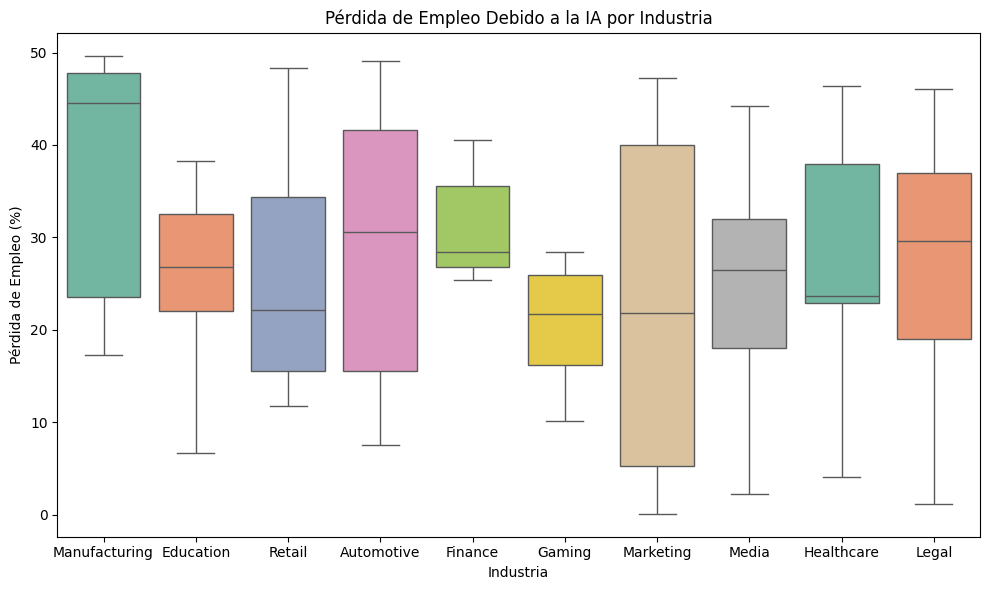

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df2, x='Industry', y='Job Loss Due to AI', palette='Set2')
plt.title('Pérdida de Empleo Debido a la IA por Industria')
plt.xlabel('Industria')
plt.ylabel('Pérdida de Empleo (%)')
plt.tight_layout()
plt.show()